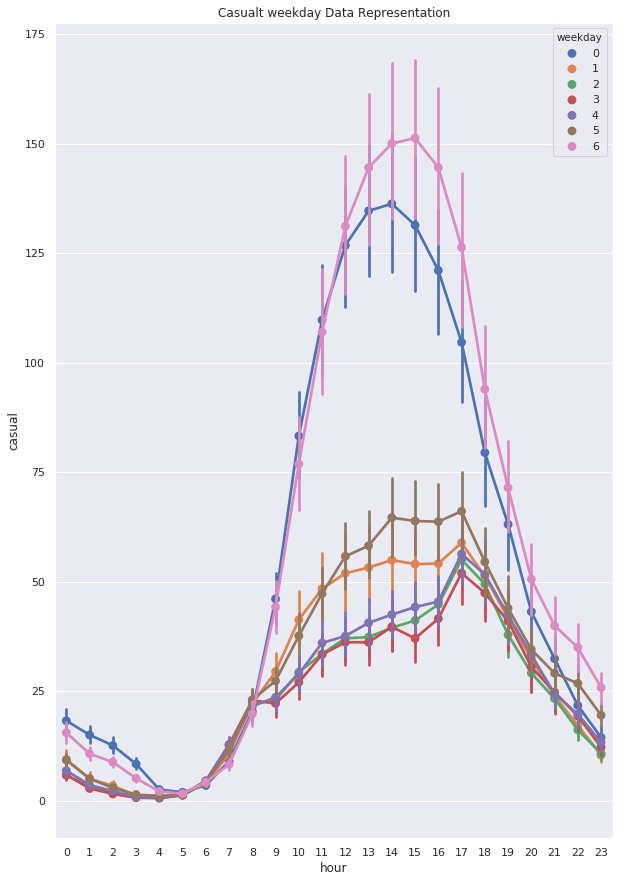

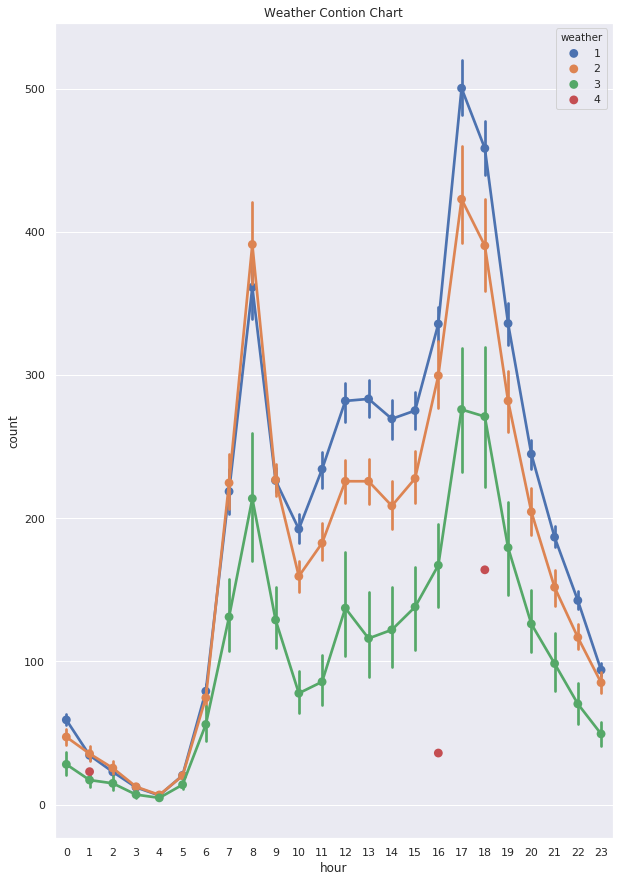

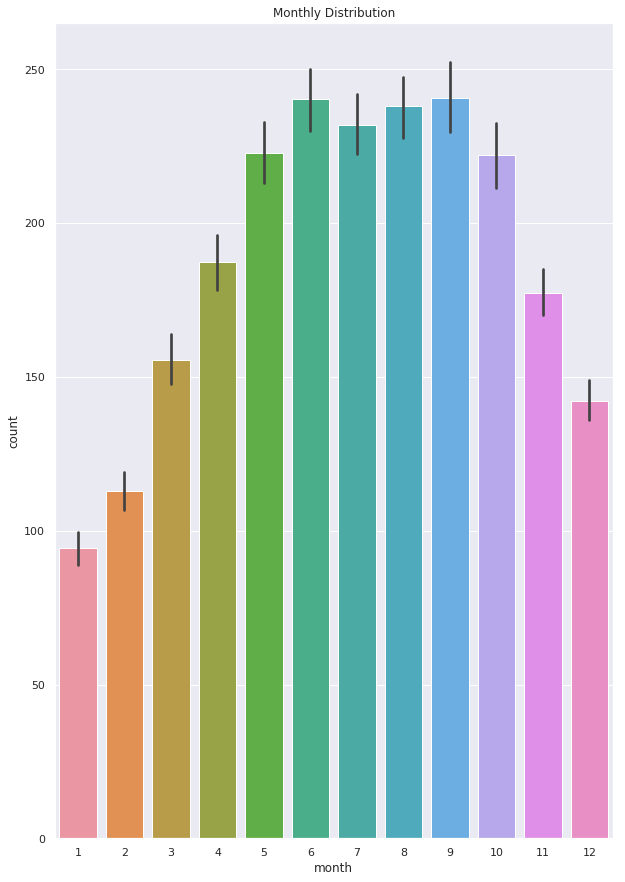

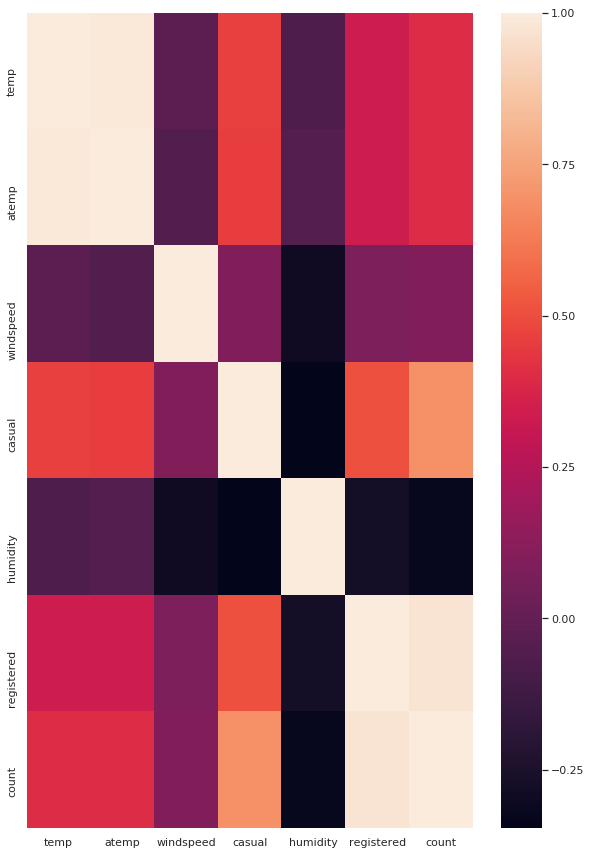

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbs
sbs.set()
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(10,15)


dataset=pd.read_csv('hour.csv')
dataset.columns
dataset.rename(columns={'weathersit':'weather','mnth':'month','hum':'humidity','hr':'hour','cnt':'count'},inplace=True)
dataset=dataset.drop(['yr','instant','dteday'],axis=1)

#Change the datatype into categorical
dataset['season']=dataset.season.astype('category')
dataset['month']=dataset.month.astype('category')
dataset['hour']=dataset.hour.astype('category')
dataset['holiday']=dataset.holiday.astype('category')
dataset['weekday']=dataset.weekday.astype('category')
dataset['workingday']=dataset.workingday.astype('category')
dataset['weather']=dataset.weather.astype('category')
dataset.isnull().sum()

#fig,ax=plt.subplots(figsize=(10,15))
#sbs.pointplot(data=dataset[['hour','count','weekday']],x='hour',y='count',hue='weekday')
#plt.title("Weekday Point graph")

sbs.pointplot(data=dataset[['hour','casual','weekday']],x='hour',y='casual',hue='weekday')
plt.title("Casualt weekday Data Representation")
plt.show()

#When Weather Condition change then the effect of bike
sbs.pointplot(data=dataset[['hour','count','weather']],x='hour',y='count',hue='weather')
plt.title("Weather Contion Chart")
plt.show()

#check monthly distribution
sbs.barplot(data=dataset[['month','count']],x='month',y='count')
plt.title("Monthly Distribution")
plt.show()

#checking the correlation
data_correlation=dataset[['temp','atemp','windspeed','casual','humidity','registered','count']].corr()
mask=np.array(correlation)
#mask[np.tril_indices_from(mask)]=False
sbs.heatmap(data_correlation)


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



data_dummy = dataset

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(1)

y=data_dummy['count']
x=data_dummy.drop('count',axis=1)




/home/kishor/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


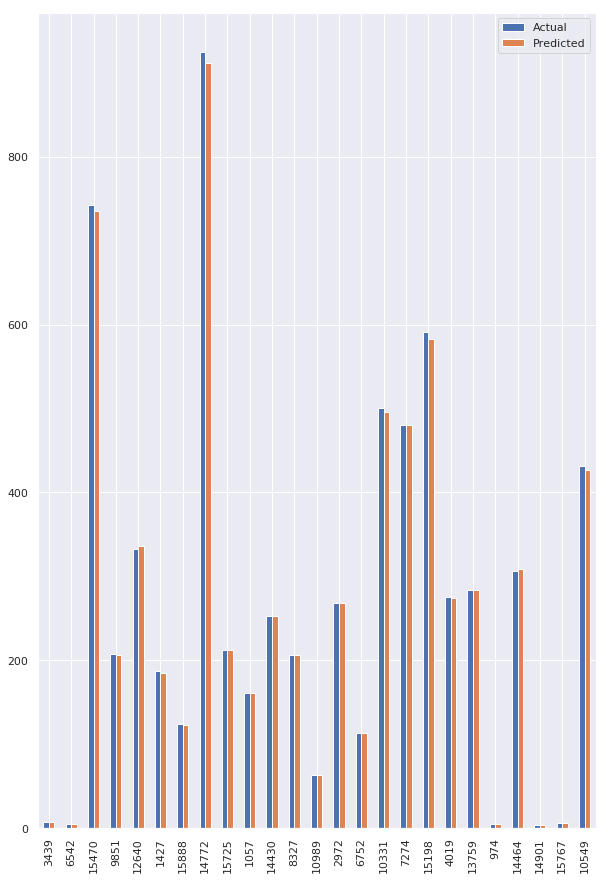

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)

df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df1=df.head(25)
df1.plot(kind='bar',figsize=(10,15))
plt.show()